In [2]:
'''Import necessary libaries and load the data'''

import numpy as np
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def findContinent(country_name):
    '''Functions finds continent for given country.'''
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    #pycountry.countries.get(name=country_name).alpha_2
    except:
        return ("not founded!")
    
df['continent'] = df.apply(lambda row: findContinent(row.Country) , axis = 1)

In [60]:
#Which columns had no missing values?
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University',
 'continent'}

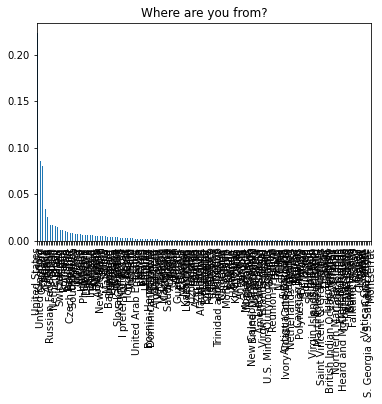

In [4]:
#bar chart of the proportion of individuals in each country

country_vals = df.Country.value_counts()#Provide a pandas series of the counts for each country

(country_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

In [2]:
#Which columns have the most missing values
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [3]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [9]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Respondent                        51392 non-null  int64  
 1    Professional                      51392 non-null  object 
 2    ProgramHobby                      51392 non-null  object 
 3    Country                           51392 non-null  object 
 4    University                        51392 non-null  object 
 5    EmploymentStatus                  51392 non-null  object 
 6    FormalEducation                   51392 non-null  object 
 7    MajorUndergrad                    42841 non-null  object 
 8    HomeRemote                        44008 non-null  object 
 9    CompanySize                       38922 non-null  object 
 10   CompanyType                       38823 non-null  object 
 11   YearsProgram                      51145 non-null  ob

In [ ]:
#get idea of their experience
#their advice to other developers
# how they learn new skill
# where they live
# what programming languages they use

# 1. Is knowledge of any programing language is conected with salary

# 2. is number of programing languages connected with salary

# 3. discrapancy between salary and expected salary for whom is the biggest

In [3]:
pip install pycountry

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=0a870aeb495607e05188be94f8632a4b063f013c725c80c9f9299bba254fe5cd
  Stored in directory: c:\users\ewelina\appdata\local\pip\cache\wheels\e2\aa\0f\c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pycountry_convert as pc

def country_to_continent(country_name):
    '''Functions finds continent for given country'''
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Example
country_name = 'Germany'
print(country_to_continent(country_name))

Europe


In [8]:
print(country_to_continent(df.Country[0]))

North America


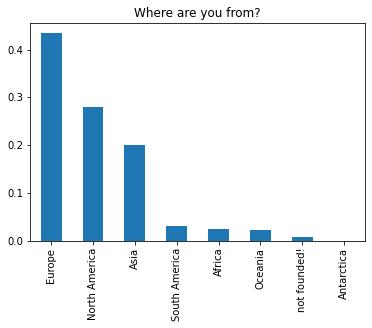

In [6]:
#bar chart of the proportion of individuals in each country

continent_vals = df.continent.value_counts()#Provide a pandas series of the counts for each country

(continent_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

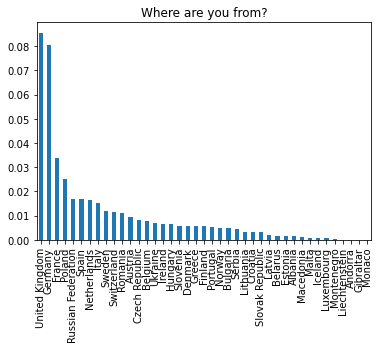

In [12]:
europe_vals=df[df["continent"] =='Europe'].Country.value_counts()
(europe_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

## 1. Is knowledge of any programing language is conected with salary

count number of HaveWorkedLanguage

In [3]:
df['NumberLanguageWorked'] = df['HaveWorkedLanguage'].str.count(' ').add(1)

In [3]:
df["HaveWorkedLanguage"]

0                                             Swift
1                     JavaScript; Python; Ruby; SQL
2                                 Java; PHP; Python
3                            Matlab; Python; R; SQL
4                                               NaN
                            ...                    
51387      C#; JavaScript; Python; SQL; VB.NET; VBA
51388                                     Java; SQL
51389                                           NaN
51390                        JavaScript; PHP; Swift
51391    Java; JavaScript; PHP; Python; Ruby; Swift
Name: HaveWorkedLanguage, Length: 51392, dtype: object

In [9]:
df[['HaveWorkedLanguage', 'NumberLanguageWorked']]

,HaveWorkedLanguage,NumberLanguageWorked
0,Swift,1.0
1,JavaScript; Python; Ruby; SQL,4.0
2,Java; PHP; Python,3.0
3,Matlab; Python; R; SQL,4.0
4,NaN,NaN
...,...,...
51387,C#; JavaScript; Python; SQL; VB.NET; VBA,6.0
51388,Java; SQL,2.0
51389,NaN,NaN
51390,JavaScript; PHP; Swift,3.0


In [18]:
df["HaveWorkedLanguage"].str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Swift,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Python,Ruby,SQL,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Java,PHP,Python,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Matlab,Python,R,SQL,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,C#,JavaScript,Python,SQL,VB.NET,VBA,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
51388,Java,SQL,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,JavaScript,PHP,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [42]:
df.HaveWorkedLanguage.str.split(';\s+', expand=True).stack().value_counts()

JavaScript        22875
SQL               18754
Java              14524
C#                12476
Python            11704
PHP               10290
C++                8155
C                  6974
TypeScript         3488
Ruby               3324
Swift              2368
Objective-C        2349
VB.NET             2273
Assembly           1823
R                  1634
Perl               1585
VBA                1574
Matlab             1569
Go                 1557
Scala              1309
Groovy             1193
CoffeeScript       1192
Visual Basic 6     1071
Lua                1039
Haskell             649
F#                  457
Rust                416
Clojure             391
Elixir              380
Smalltalk           327
Erlang              281
Common Lisp         273
Dart                145
Julia               138
Hack                107
dtype: int64

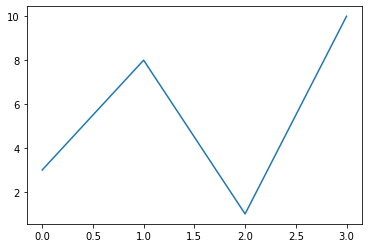

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array([0, 1, 2, 3])
y1 = np.array([3, 8, 1, 10])

plt.plot(x1, y1)
plt.show()

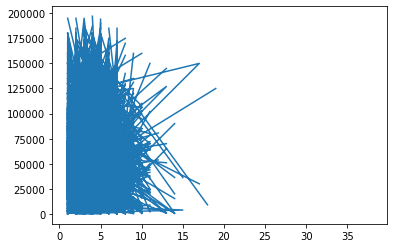

In [32]:
x1 = df['NumberLanguageWorked']
y1 = df['Salary']

plt.plot(x1, y1)
plt.show()

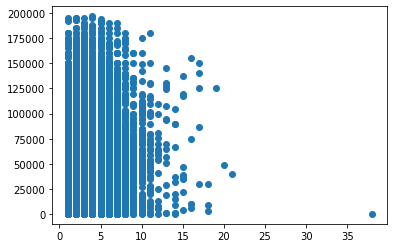

In [33]:
pyplot.scatter(df['NumberLanguageWorked'], df['Salary'])
pyplot.show()

In [34]:
mean=df.groupby('NumberLanguageWorked')['Salary'].mean()

<AxesSubplot:xlabel='NumberLanguageWorked'>

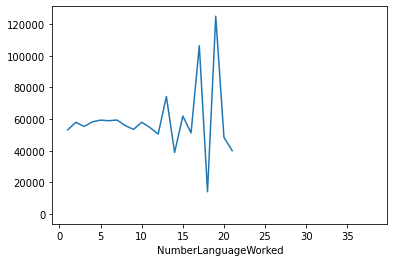

In [30]:
df.groupby('NumberLanguageWorked')['Salary'].mean().plot()

<AxesSubplot:xlabel='NumberLanguageWorked'>

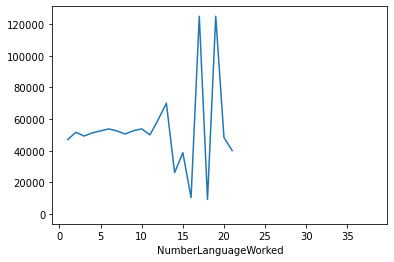

In [31]:
df.groupby('NumberLanguageWorked')['Salary'].median().plot()

drop the missing values of the response (Salary) - store this in drop_sal_df, then impute the values for all the other missing values with the mean of the column - store this in fill_df.

In [35]:
drop_sal_df = df.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent,NumberLanguageWorked
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe,3.0
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,Europe,3.0
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,North America,7.0
18,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN,North America,NaN
22,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN,Asia,1.0


In [37]:
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [39]:
fill_mean = lambda col: col.fillna(col.mean())

In [44]:
#df['Salary'].fillna((df['Salary'].mean()), inplace=True)

In [46]:
df['Salary']

0         56298.480641
1         56298.480641
2        113750.000000
3         56298.480641
4         56298.480641
             ...      
51387     58000.000000
51388     56298.480641
51389     56298.480641
51390     40000.000000
51391     56298.480641
Name: Salary, Length: 51392, dtype: float64

In [59]:
df.groupby('NumberLanguageWorked')['Salary'].median().plot()

DataError: No numeric types to aggregate

In [58]:
#df['Salary'].fillna((df['Salary'].mean()), inplace=True)
df['Salary']=df['Salary'].fillna(df.groupby('NumberLanguageWorked')['Salary'].mean(), inplace=True)

In [ ]:
#b = a.fillna(a.groupby(['period_id', 'gic_subindustry_id']).transform("mean"))

In [5]:
df['Salary'].isna().sum()

38501

In [14]:
df_copy=df
df_copy.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent,NumberLanguageWorked
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,North America,1.0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,Europe,4.0


In [21]:
df["Salary"] = df['Salary'].fillna(df.groupby('NumberLanguageWorked')['Salary'].transform('mean'))
df["Salary"]

0         53167.089577
1         58238.351358
2        113750.000000
3         58238.351358
4                  NaN
             ...      
51387     58000.000000
51388     57944.074622
51389              NaN
51390     40000.000000
51391     58934.946843
Name: Salary, Length: 51392, dtype: float64

In [47]:
df[['Salary','NumberLanguageWorked']][(df["Salary"].isna())&(~df["NumberLanguageWorked"].isna())].sort_values("NumberLanguageWorked")

,Salary,NumberLanguageWorked
11579,NaN,22.0
21725,NaN,22.0
37745,NaN,22.0
41539,NaN,22.0
49019,NaN,23.0
31798,NaN,24.0
40991,NaN,24.0
36610,NaN,25.0
48651,NaN,26.0
43069,NaN,30.0


In [49]:
df[['Salary','NumberLanguageWorked']][(~df["Salary"].isna())&(df["NumberLanguageWorked"].isna())]

,Salary,NumberLanguageWorked
18,82500.000000,NaN
69,32258.064516,NaN
152,107816.711590,NaN
171,47511.312217,NaN
219,50000.000000,NaN
...,...,...
50869,73000.000000,NaN
50928,34408.602151,NaN
51149,16884.451622,NaN
51220,48387.096774,NaN


In [51]:
df[['Salary','NumberLanguageWorked']][(df["Salary"].isna())&(df["NumberLanguageWorked"]<20)]

,Salary,NumberLanguageWorked


In [53]:
df_copy[['Salary','NumberLanguageWorked']][(df_copy["Salary"].isna())&(df_copy["NumberLanguageWorked"]<20)]

,Salary,NumberLanguageWorked


In [57]:
df_copy=df_copy[(df_copy["NumberLanguageWorked"]<20)]
df_copy.shape

(36591, 156)

In [58]:
df.shape

(51392, 156)

### Majority of asked people can program in 3 languages (more than 20%). When narrowing down data to programmers who can program in 6 or less, there is a hughe jump in avarage Salary from one known language or two (from 53,000 to 58,000) but then there is stable with an exception in knowledge of 3 programming languages

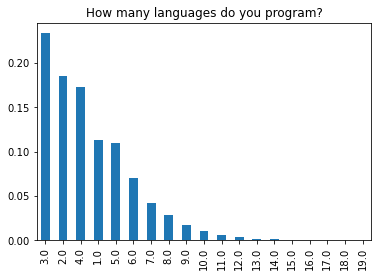

In [74]:
#bar chart of the proportion of individuals in each country

language_vals = df_copy.NumberLanguageWorked.value_counts()#Provide a pandas series of the counts for each country

(language_vals/df_copy.shape[0]).plot(kind="bar");
plt.title("How many languages do you program?");

<AxesSubplot:title={'center':'Salary'}, xlabel='NumberLanguageWorked'>

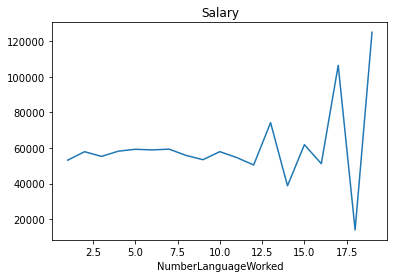

In [78]:
df_copy.groupby('NumberLanguageWorked')['Salary'].mean().plot(title='Salary')

In [66]:
df_copy[['NumberLanguageWorked','Salary']][(df_copy["NumberLanguageWorked"]>12)&(df_copy["NumberLanguageWorked"]<14)].sort_values("NumberLanguageWorked")

,NumberLanguageWorked,Salary
958,13.0,74261.175695
43807,13.0,74261.175695
43189,13.0,74261.175695
43135,13.0,860.215054
42934,13.0,74261.175695
...,...,...
17298,13.0,74261.175695
16771,13.0,74261.175695
16522,13.0,74261.175695
27305,13.0,74261.175695


In [81]:
df_copy_10=df_copy[(df_copy["NumberLanguageWorked"]<7)]
df_copy_10.shape

(32408, 156)

<AxesSubplot:title={'center':'Salary'}, xlabel='NumberLanguageWorked'>

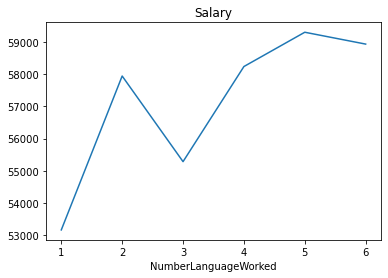

In [82]:
df_copy_10.groupby('NumberLanguageWorked')['Salary'].mean().plot(title='Salary')

In [28]:
df_copy['Salary'].isna().sum()

14017

### Salary ~ Python versus other programing languages

In [92]:
df[df["Salary"].isna()].count()

Respondent              14017
Professional            14017
ProgramHobby            14017
Country                 14017
University              14017
                        ...  
InterestedAnswers         612
Salary                      0
ExpectedSalary            380
continent               14017
NumberLanguageWorked       13
Length: 156, dtype: int64

In [4]:
df_salary=df[(~df["Salary"].isna())&(~df["HaveWorkedLanguage"].isna())]

In [101]:
df_salary[['Respondent','HaveWorkedLanguage']][df_salary['HaveWorkedLanguage'].isna()]

,Respondent,HaveWorkedLanguage


In [ ]:
#df['NumberLanguageWorked'] = df['HaveWorkedLanguage'].str.count(' ').add(1)

In [103]:
df_salary[['Respondent','HaveWorkedLanguage']][df_salary['HaveWorkedLanguage'].str.contains('Python')]

,Respondent,HaveWorkedLanguage
1,2,JavaScript; Python; Ruby; SQL
2,3,Java; PHP; Python
3,4,Matlab; Python; R; SQL
6,7,Matlab; Python
7,8,CoffeeScript; Clojure; Elixir; Erlang; Haskell...
...,...,...
51378,51379,JavaScript; Objective-C; Python; Swift
51381,51382,JavaScript; Python
51385,51386,C#; JavaScript; PHP; Python; R; SQL
51387,51388,C#; JavaScript; Python; SQL; VB.NET; VBA


In [106]:
df_salary['HaveWorkedLanguage'].isin(['Python'])

529

In [107]:
df_salary['Python'] = np.where(df_salary['HaveWorkedLanguage'].isin(['Python']), True, False)

<ipython-input-107-f874eb96d592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Python'] = np.where(df_salary['HaveWorkedLanguage'].isin(['Python']), True, False)


In [5]:
df_salary['Python']=df_salary['HaveWorkedLanguage'].str.contains('Python', case=False, na=False)

<ipython-input-5-f56015fb3a6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Python']=df_salary['HaveWorkedLanguage'].str.contains('Python', case=False, na=False)


In [6]:
df_salary['Python'][df_salary['HaveWorkedLanguage'].str.contains('Python')].value_counts()

True    3442
Name: Python, dtype: int64

In [7]:
df_salary['Python'][~df_salary['HaveWorkedLanguage'].str.contains('Python')].value_counts()

False    8686
Name: Python, dtype: int64

## It is better to know Python than not to know

<AxesSubplot:title={'center':'Salary~Python'}, xlabel='Python'>

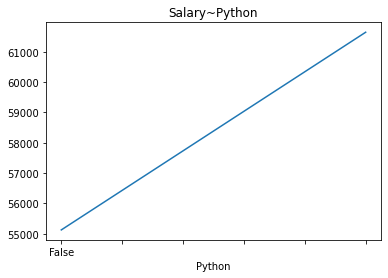

In [8]:
df_salary.groupby('Python')['Salary'].mean().plot(title='Salary~Python')

### 3. discrapancy between salary and expected salary for whom is the biggest

In [4]:
df_continent=df[(~df["Salary"].isna())]
df_continent.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,Europe
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,North America


<AxesSubplot:title={'center':'Salary~continent'}, xlabel='continent'>

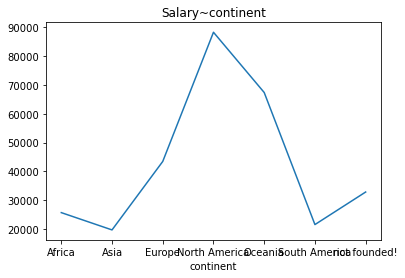

In [5]:
df_continent.groupby('continent')['Salary'].mean().plot(title='Salary~continent')

In [7]:
df_europe=df_continent[(df_continent["continent"]=="Europe")]
df_europe['continent'].value_counts()

Europe    5877
Name: continent, dtype: int64

<AxesSubplot:title={'center':'Salary~Europe'}, xlabel='Country'>

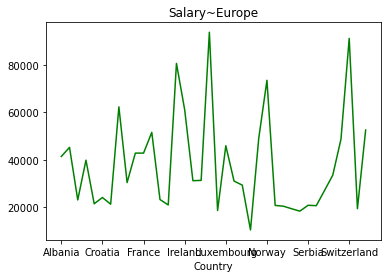

In [8]:
df_europe.groupby('Country')['Salary'].mean().plot(title='Salary~Europe',color='green')

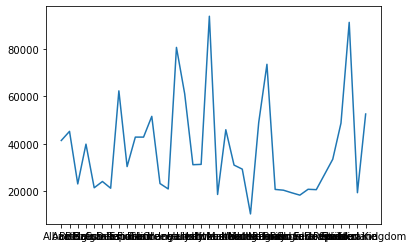

In [9]:
plt.plot(df_europe.groupby('Country')['Salary'].mean())

In [10]:
country_list = df_europe.groupby('Country')['Salary'].mean().value_counts().index.tolist()

In [11]:
df_europe['Salary'].mean()

43458.45067858717

In [12]:
country_mean=pd.DataFrame(df_europe.groupby('Country', as_index=False).agg({"Salary": "mean"}).sort_values("Salary",ascending=False))
country_mean.head(3)

,Country,Salary
18,Liechtenstein,93766.666667
35,Switzerland,91189.692616
14,Iceland,80645.161290


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

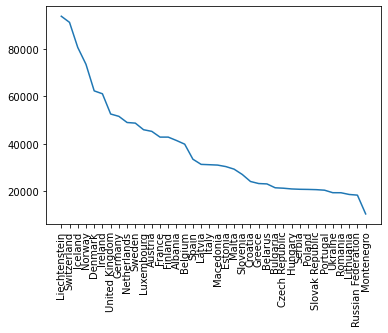

In [13]:
plt.plot(country_mean['Country'],country_mean['Salary'])
plt.xticks(rotation=90)

In [14]:
df_ExpectedEU=df[(~df["ExpectedSalary"].isna())&(df["continent"]=="Europe")]
df_ExpectedEU.shape

(1160, 155)

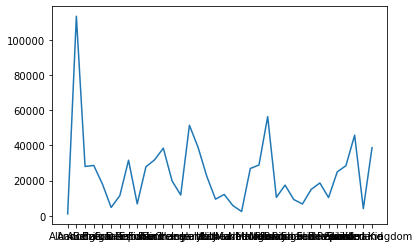

In [15]:
plt.plot(df_ExpectedEU.groupby('Country')['ExpectedSalary'].mean())

In [17]:
ExpectedEU_mean=pd.DataFrame(df_ExpectedEU.groupby('Country', as_index=False).agg({"ExpectedSalary": "mean"}).sort_values("ExpectedSalary",ascending=False))
ExpectedEU_mean.head(3)

,Country,ExpectedSalary
1,Andorra,113636.363636
23,Norway,56480.314161
14,Iceland,51516.129032


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

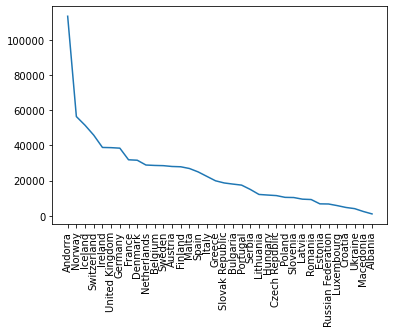

In [18]:
plt.plot(ExpectedEU_mean['Country'],ExpectedEU_mean['ExpectedSalary'])
plt.xticks(rotation=90)

In [19]:
merge=pd.merge(country_mean, ExpectedEU_mean, on='Country')
merge.head(3)

,Country,Salary,ExpectedSalary
0,Switzerland,91189.692616,45863.709677
1,Iceland,80645.161290,51516.129032
2,Norway,73534.353022,56480.314161


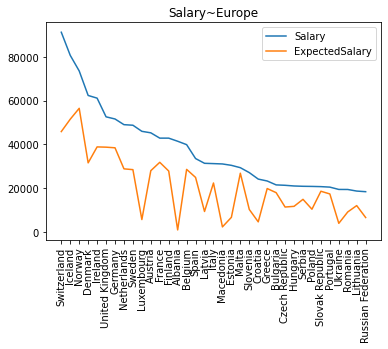

In [22]:
plt.plot(merge['Country'],merge['Salary'], label = "Salary")
plt.plot(merge['Country'],merge['ExpectedSalary'], label = "ExpectedSalary")
plt.xticks(rotation=90)
plt.title('Salary~Europe')
plt.legend(["Salary", "ExpectedSalary"], loc ="upper right")